In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from db_function import *

In [2]:
db=My_db(sqlite3.connect('insurance.db'))

In [3]:
ins=db.read_data('incomestatement')
ba=db.read_data('balancesheet')
cf=db.read_data('cashflow')

ins.index=pd.to_datetime(ins.index)
ba.index=pd.to_datetime(ba.index)
cf.index=pd.to_datetime(cf.index)

/var/folders/37/b_ywzpxn743gl8js4stkcm4m0000gn/T/ipykernel_1210/570707782.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  ins.index=pd.to_datetime(ins.index)
/var/folders/37/b_ywzpxn743gl8js4stkcm4m0000gn/T/ipykernel_1210/570707782.py:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  ba.index=pd.to_datetime(ba.index)
/var/folders/37/b_ywzpxn743gl8js4stkcm4m0000gn/T/ipykernel_1210/570707782.py:7: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  cf.index=pd.to_datetime(cf.index)


In [39]:
ba1=db.read_data('balancesheet1').reset_index().set_index('YearReport')
ba2=db.read_data('balancesheet2').reset_index().set_index('YearReport')
ins1=db.read_data('incomestatement1').reset_index().set_index('YearReport')

In [20]:
ticker='PTI'

# Slide 3: Phân tích Solvency:

## Solvency ratio

Công thức cho non-life: Logarit tự nhiên của (Tổng tài sản - Tổng nợ)

Text(0.5, 1.0, 'PTI')

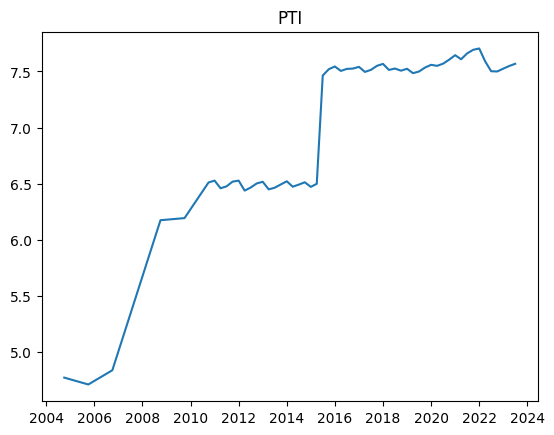

In [5]:
solvency_ratio =np.log(ba[ba['ticker']==ticker]['asset']-ba[ba['ticker']==ticker]['debt'])
plt.plot(solvency_ratio)
plt.title(ticker)

## Combined ratio

Chỉ tiêu tỷ lệ kết hợp (Combined ratio): Chỉ tiêu này đánh giá mức độ lãi/lỗ hoạt động kinh doanh bảo hiểm của doanh nghiệp.
- x = Tỷ lệ bồi thường (x1) + Tỷ lệ chi phí hoạt động kinh doanh bảo hiểm (x2)
    - Trong đó:
        - x1 =Tổng chi bồi thường bảo hiểm thuộc trách nhiệm giữ lại (A)/Doanh thu phí bảo hiểm thuần (B)
        - x2=Tổng chi phí hoạt động kinh doanh (C) / Doanh thu phí bảo hiểm thuần (B)


### Data Trang

In [51]:
res=ins1[ins1['Ticker']==ticker][['Bồi thường thuộc trách nhiệm giữ lại','Tổng chi trực tiếp hoạt động kinh doanh bảo hiểm']].sum(axis=1)/ins1[ins1['Ticker']==ticker]['Doanh thu thuần từ hoạt động kinh doanh bảo hiểm ']

<Axes: xlabel='YearReport'>

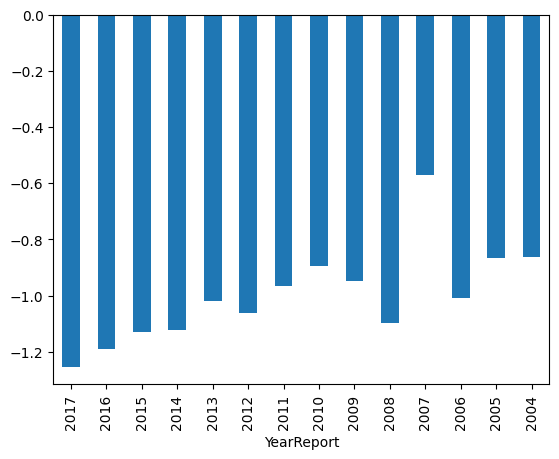

In [52]:
res.plot(kind='bar')

### Data co

In [6]:
s6_21=db.read_data('s6_21')
s6_20=db.read_data('s6_20')
s6_19=db.read_data('s6_19')
s6_18=db.read_data('s6_18')
s6_17=db.read_data('s6_17')

In [7]:
s3_21=db.read_data('s3_21')
s3_20=db.read_data('s3_20')
s3_19=db.read_data('s3_19')
s3_18=db.read_data('s3_18')
s3_17=db.read_data('s3_17')

Tinh x1

In [8]:
s6_tick=pd.concat([s6_21[s6_21.index==ticker],
           s6_20[s6_20.index==ticker],
           s6_19[s6_19.index==ticker],
           s6_18[s6_18.index==ticker],
           s6_17[s6_17.index==ticker]])
s6_tick.index=[f'{i}-01-01' for i in range(2021,2016,-1)]

In [9]:
s3_tick=pd.concat([s3_21[s3_21.index==ticker],
           s3_20[s3_20.index==ticker],
           s3_19[s3_19.index==ticker],
           s3_18[s3_18.index==ticker],
           s3_17[s3_17.index==ticker]])
s3_tick.index=[f'{i}-01-01' for i in range(2021,2016,-1)]

In [10]:
x1=pd.DataFrame(index=s3_tick.index)
x1['A']=s6_tick['Bồi thường thuộc trách nhiệm giữ lại\nNet claims paid'].values
x1['B']=s3_tick['Doanh thu phí bảo hiểm gốc\nDirect premium\n'].values
def get_x1(df):
    return np.float(df['A'])/np.float(df['B'])
x1['res']=x1.apply(get_x1,axis=1)

/var/folders/37/b_ywzpxn743gl8js4stkcm4m0000gn/T/ipykernel_1120/2375720291.py:5: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return np.float(df['A'])/np.float(df['B'])


In [11]:
ins['year']=[i.year for i in ins.index]
x2=pd.DataFrame()
x2['C']=ins[ins['ticker']==ticker].groupby('year').sum()['operationExpense']

In [12]:
x2=x2[(x2.index<=2021)&(x2.index>=2017)].sort_index(ascending=False)
x2.index=x1.index
x2['res']=x2['C']/x1['B']

combined_ratio

Text(0.5, 1.0, 'PTI')

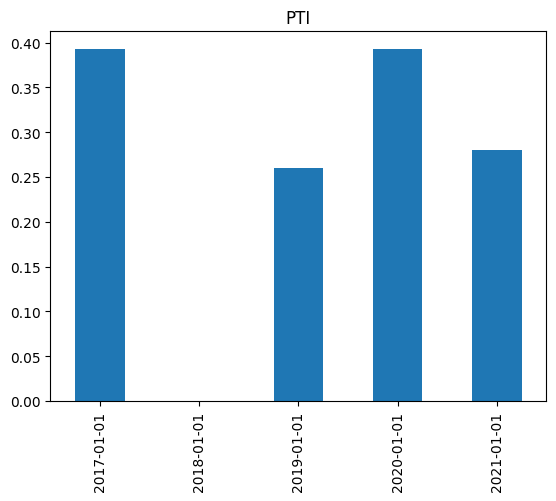

In [13]:
combined_ratio=((x1['res']+x2['res']).fillna(0))
combined_ratio.sort_index().plot(kind='bar')
plt.title(ticker)

# Slide 4: Phân tích Profitability

## Chỉ tiêu tỷ lệ lợi nhuận thuần hoạt động kinh doanh bảo hiểm

### Data Trang

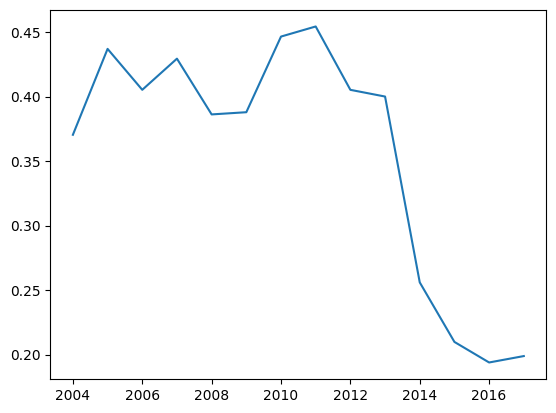

In [57]:
x=(ins1[ins1['Ticker']==ticker]['Lợi nhuận gộp hoạt động kinh doanh bảo hiểm']/ins1[ins1['Ticker']==ticker]['Doanh thu thuần từ hoạt động kinh doanh bảo hiểm '])
plt.plot(x)

### Data co

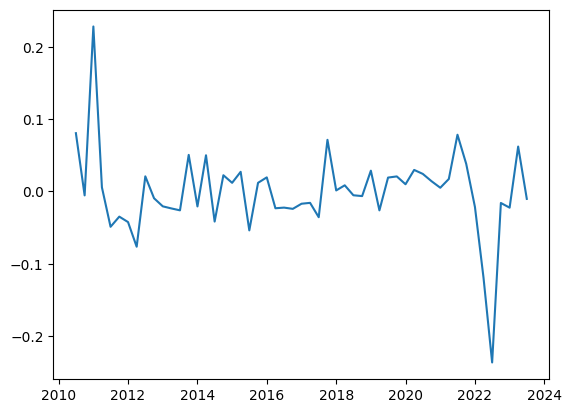

In [34]:
res=ins[ins['ticker']==ticker][['operationProfit']].div(ins[ins['ticker']==ticker]['revenue'],axis=0)
plt.plot(res)

## Chỉ tiêu tỷ suất lợi nhuận trên nguồn vốn chủ sở hữu

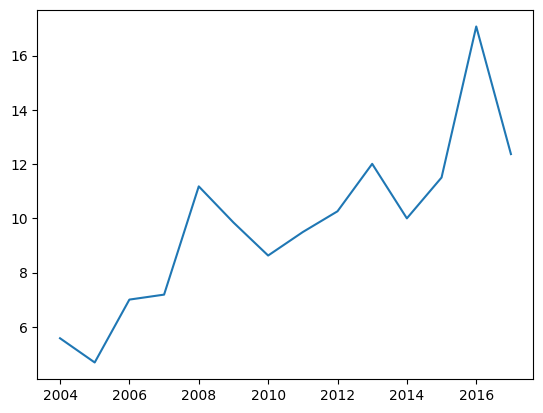

In [68]:
plt.plot(ba1[ba1['Ticker']==ticker]['VỐN CHỦ SỞ HỮU']/ins1[ins1['Ticker']==ticker]['Lợi nhuận sau thuế của chủ sở hữu, tập đoàn '])